In [91]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
import glob
import pathlib

## Path to root dir containing the netcdfs. 

In [92]:
path = "/Users/gunnar/src/data/S2GM/processed/"


In [93]:
def get_date(dat):
    t0 = dat.attrs['Temporal extent - Starting date']
    IT = dat.attrs['Temporal extent - Ending date']
    the_date = datetime.strptime(t0[0:10], '%Y-%m-%d') + (datetime.strptime(IT[0:10], '%Y-%m-%d') - datetime.strptime(t0[0:10], '%Y-%m-%d'))/2
    return dat.assign_coords(time=the_date)

In [94]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 18B3-392A

 Directory of C:\Users\gunnar\src\data\S2GM\processed

08/05/2018  16:20    <DIR>          .
08/05/2018  16:20    <DIR>          ..
08/05/2018  14:40    <DIR>          .ipynb_checkpoints
26/04/2018  11:38    <DIR>          Kapuvar
21/04/2018  16:44        91,292,786 S2GM_M60_20170403_20170430_T32UME_STD_v1.0.0_ABD9B737.nc
21/04/2018  16:46        70,552,262 S2GM_M60_20170503_20170530_T32UME_STD_v1.0.0_D679C6A2.nc
21/04/2018  16:48        92,913,980 S2GM_M60_20170602_20170629_T32UME_STD_v1.0.0_DCA1D479.nc
21/04/2018  16:51        85,733,349 S2GM_M60_20170702_20170729_T32UME_STD_v1.0.0_FA9E946A.nc
21/04/2018  16:53        63,840,295 S2GM_M60_20170804_20170831_T32UME_STD_v1.0.0_EB619BC5.nc
21/04/2018  16:55        92,602,183 S2GM_M60_20170903_20170930_T32UME_STD_v1.0.0_AF86F7D1.nc
21/04/2018  16:57        81,982,340 S2GM_M60_20171003_20171030_T32UME_STD_v1.0.0_05004323.nc
21/04/2018  17:00        89,846,092 S2GM_M60_2017110

dict of dicts, Name of dists corresponds to attribute name, key to the variable in the datast and value the value of the attribute

In [95]:
indat = xr.open_mfdataset('*.nc', concat_dim='time', preprocess=get_date) 

In [96]:
indat

<xarray.Dataset>
Dimensions:                       (time: 12, x: 1830, y: 1830)
Coordinates:
    lat                           (y, x) float64 54.14 54.14 54.14 54.14 ...
    lon                           (y, x) float64 7.469 7.47 7.471 7.472 ...
  * time                          (time) datetime64[ns] 2017-04-16T12:00:00 ...
Dimensions without coordinates: x, y
Data variables:
    B1                            (time, y, x) float32 dask.array<shape=(12, 1830, 1830), chunksize=(1, 1830, 1830)>
    B2                            (time, y, x) float32 dask.array<shape=(12, 1830, 1830), chunksize=(1, 1830, 1830)>
    B3                            (time, y, x) float32 dask.array<shape=(12, 1830, 1830), chunksize=(1, 1830, 1830)>
    B4                            (time, y, x) float32 dask.array<shape=(12, 1830, 1830), chunksize=(1, 1830, 1830)>
    B5                            (time, y, x) float32 dask.array<shape=(12, 1830, 1830), chunksize=(1, 1830, 1830)>
    B6                            (t

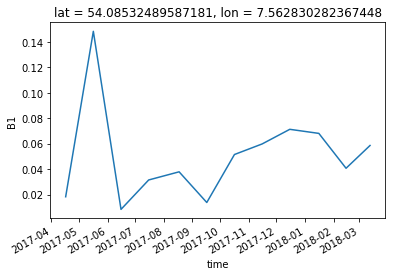

In [98]:
indat.B1.isel(x=100,y=100).plot()

In [129]:
indat_loaed = indat.isel(x=slice(90,110),y=slice(90,110)).load()
in_resampled = indat_loaed.resample(time='5d',keep_attrs=True).interpolate(kind='nearest')
in_resampled2 = indat_loaed.resample(time='5d',keep_attrs=True).interpolate(kind='linear')

In [130]:
in_resampled2.B1

<xarray.DataArray 'B1' (time: 67, y: 20, x: 20)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,  0.017   ],
        ..., 
        [ 0.0179  ,  0.0184  , ...,       nan,       nan],
        [ 0.0173  ,  0.0171  , ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,  0.047517],
        ..., 
        [ 0.028817,  0.028767, ...,       nan,       nan],
        [ 0.027867,  0.0276  , ...,       nan,       nan]],

       ..., 
       [[ 0.044285,  0.043954, ...,  0.057262,  0.055777],
        [ 0.029065,  0.043596, ...,  0.055931,  0.055831],
        ..., 
        [ 0.054938,  0.064946, ...,  0.060212,  0.056962],
        [ 0.055681,  0.055885, ...,  0.057454,  0.060058]],

       [[ 0.0434  ,  0.0433  , ...,  0.0583  ,  0.0577  ],
        [ 0.0247  ,  0.0425  , ...,  0.0582  ,  0.0576  ],
        ..., 
        [ 0.0559  ,  0.0686  , ...,  0.059   ,  0.

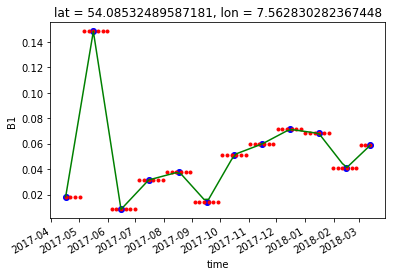

In [131]:
indat_loaed.isel(x=10,y=10).B1.plot.line('bo')
in_resampled.isel(x=10,y=10).B1.plot.line('r.')
in_resampled2.isel(x=10,y=10).B1.plot.line('g-')